In [1]:
!pip install tensorflow.gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 1.7 MB 13.6 MB/s 
     |████████████████████████████████| 439 kB 21.8 MB/s 
     |████████████████████████████████| 6.0 MB 35.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

## **1. Importing Libraries**

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

from sklearn.metrics import confusion_matrix, accuracy_score

## 2.Importing Data

In [5]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 3. Understanding Data

In [49]:
data.shape


(10000, 14)

In [50]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [51]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

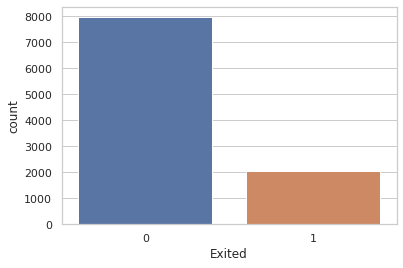

In [72]:
sns.countplot(x="Exited", data=data)

> We can see that aound 2000 people have exited the bank

In [76]:
exited_cust= data.loc[data['Exited']==1]
non_exited_cust= data.loc[data['Exited']==0]

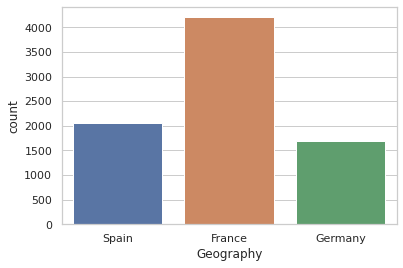

In [83]:
sns.countplot(data=non_exited_cust,x= 'Geography')

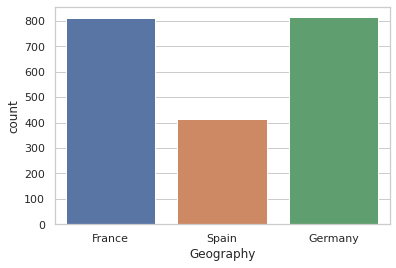

In [84]:
sns.countplot(data=exited_cust,x= 'Geography')

> There is no much significance of location on the churn.

## 4. Splitting the Data

In [8]:
x = data.iloc[:,3:-1]
y = data['Exited']

In [9]:
x.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
# Feature Engineering
geography = pd.get_dummies(x['Geography'])
gender = pd.get_dummies(x['Gender'])

In [13]:
# concatenate these variables with the dataframe
x = x.drop(['Geography','Gender'], axis=1)

In [14]:
x = pd.concat([x, gender, geography], axis=1)

In [15]:
#Splitting into training and testing data
x_train, x_test, y_train , y_test = train_test_split(x , y, test_size=0.2, random_state=0)

In [16]:
#Feature scaling

sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.30102557, -1.37744033, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.98560362,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [-0.62420521, -0.08179119,  1.39076231, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.28401079,  0.87525072, -1.37744033, ..., -1.01460667,
         1.75486502, -0.57369368]])

In [18]:
x_train.shape

(8000, 13)

In [19]:
x_test.shape

(2000, 13)

## 5. Model Building

In [22]:
#Initializing ANN
classifier = Sequential()

# Adding input layer
classifier.add(Dense(units = 11, activation = 'relu'))

# Adding first hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))

# Adding 2nd hidden layer
classifier.add(Dense(units= 6 , activation = 'relu'))

# Adding outputlayer
classifier.add(Dense(1, activation = 'sigmoid'))

In [23]:
# to set learning rate in optimizers (optional)
## opt =  tensorflow.keras.optimizers.Adam(learning_rate= 0.01)

In [24]:
classifier.compile(optimizer='adam', loss= 'binary_crossentropy', metrics=['accuracy'])

In [28]:
model = classifier.fit(x_train,y_train, validation_split= 0.33, batch_size=10, epochs= 100)

Epoch 1/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3192 - accuracy: 0.8664 - val_loss: 0.3747 - val_accuracy: 0.8383
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3177 - accuracy: 0.8688 - val_loss: 0.3726 - val_accuracy: 0.8413
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3182 - accuracy: 0.8671 - val_loss: 0.3773 - val_accuracy: 0.8421
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3181 - accuracy: 0.8677 - val_loss: 0.3712 - val_accuracy: 0.8466
Epoch 5/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3180 - accuracy: 0.8696 - val_loss: 0.3736 - val_accuracy: 0.8429
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3184 - accuracy: 0.8698 - val_loss: 0.3716 - val_accuracy: 0.8470
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3188 - accuracy: 0.8694 - val_loss: 0.3719 - val_accuracy: 0.8448

In [29]:
# if the accuracy fluctuates in a certain accuracy value when epoch is large we can early stop
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False)

In [31]:
model = classifier.fit(x_train,y_train, validation_split= 0.33, batch_size=10, epochs= 100, callbacks = early_stopping)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3081 - accuracy: 0.8746 - val_loss: 0.3867 - val_accuracy: 0.8466
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3083 - accuracy: 0.8735 - val_loss: 0.3843 - val_accuracy: 0.8451
Epoch 3/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3069 - accuracy: 0.8720 - val_loss: 0.3855 - val_accuracy: 0.8387
Epoch 4/100
536/536 [==============================] - 2s 3ms/step - loss: 0.3066 - accuracy: 0.8724 - val_loss: 0.3844 - val_accuracy: 0.8413
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3065 - accuracy: 0.8729 - val_loss: 0.3830 - val_accuracy: 0.8478
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3072 - accuracy: 0.8722 - val_loss: 0.3849 - val_accuracy: 0.8413
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3068 - accuracy: 0.8711 - val_loss: 0.3903 - val_accuracy: 0.8360

In [32]:
model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

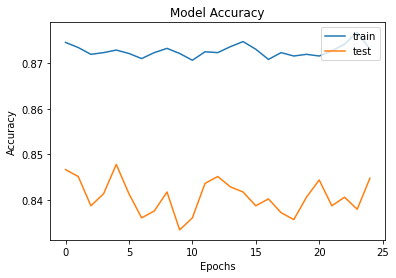

In [38]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [43]:
y_pred = classifier.predict(x_test)
y_pred= (y_pred>0.5)

63/63 [==============================] - 0s 3ms/step


In [44]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[1508,   87],
       [ 192,  213]])

In [46]:
accuracy_score(y_pred,y_test)

0.8605

In [48]:
classifier.get_weights()

[array([[-6.08666480e-01,  5.87176919e-01,  5.31427236e-03,
          8.63510221e-02, -1.74391329e-01,  1.24660194e-01,
          2.20925193e-02,  3.09739143e-01, -3.05742055e-01,
         -2.76550531e-01,  8.25019367e-03],
        [-8.75385851e-02, -1.22115326e+00,  6.70810759e-01,
          7.74927020e-01,  8.21612775e-01, -9.83012617e-02,
          5.50232112e-01, -4.41813946e-01,  6.61270857e-01,
         -1.33795130e+00, -3.32679808e-01],
        [ 8.10096204e-01,  3.36983204e-01,  1.18997477e-01,
          4.31551412e-02,  2.19357386e-01,  4.69641149e-01,
          2.04128444e-01,  3.80753338e-01, -2.15796083e-01,
          4.27364618e-01,  2.12242991e-01],
        [-5.70831418e-01, -3.12488109e-01,  8.32030177e-02,
         -1.69236809e-01, -2.17780024e-01, -5.64774692e-01,
         -1.21122688e-01, -6.87837601e-01, -4.40147072e-01,
          5.51116109e-01, -1.69597194e-01],
        [ 1.67957023e-01,  4.00287181e-01,  1.02292204e+00,
         -1.02175057e+00, -1.71411425e-01, -